### Unpacking the folders

In [1]:
# Set the testing to either protector or attacker
test = "ATTACKER"

In [31]:
import os
import polars as pl
from scipy.stats import ttest_ind

# Paths to your result folders
folder_base = "C:/Users/timo_/OneDrive/Bureau/unif/VU_Amsterdam/PCI/collective-intelligence/Assignment_2/test_results/base_case"
folder_protector = "C:/Users/timo_/OneDrive/Bureau/unif/VU_Amsterdam/PCI/collective-intelligence/Assignment_2/test_results/attacker"

def get_final_prey_counts(folder_path):
    prey_counts = []
    for file in os.listdir(folder_path):
        if not file.endswith(".csv"):
            continue
        df = pl.read_csv(os.path.join(folder_path, file))
        max_frame = df["frame"].max()
        final_frame_prey = df.filter((pl.col("frame") == max_frame) & (pl.col("kind") == "Prey"))
        prey_counts.append(final_frame_prey.height)
    return prey_counts

# Get final prey counts for each simulation run
prey_base = get_final_prey_counts(folder_base)
prey_protector = get_final_prey_counts(folder_protector)

# Run independent t-test
t_stat, p_value = ttest_ind(prey_base, prey_protector, equal_var=False)

print("Base case prey survivors (n={}):".format(len(prey_base)), prey_base)
print("Protector case prey survivors (n={}):".format(len(prey_protector)), prey_protector)
print(f"\nT-statistic = {t_stat:.4f}")
print(f"P-value = {p_value:.4f}")


Base case prey survivors (n=30): [315, 4, 426, 2, 160, 147, 422, 412, 14, 431, 51, 142, 18, 449, 437, 70, 423, 53, 10, 11, 210, 235, 419, 411, 11, 8, 437, 39, 45, 3]
Protector case prey survivors (n=31): [0, 7, 2, 0, 0, 1, 5, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 2, 0, 0, 2, 0, 0, 2, 2, 0]

T-statistic = 5.7563
P-value = 0.0000


C:\Users\timo_\AppData\Local\Temp\ipykernel_20100\3992595276.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


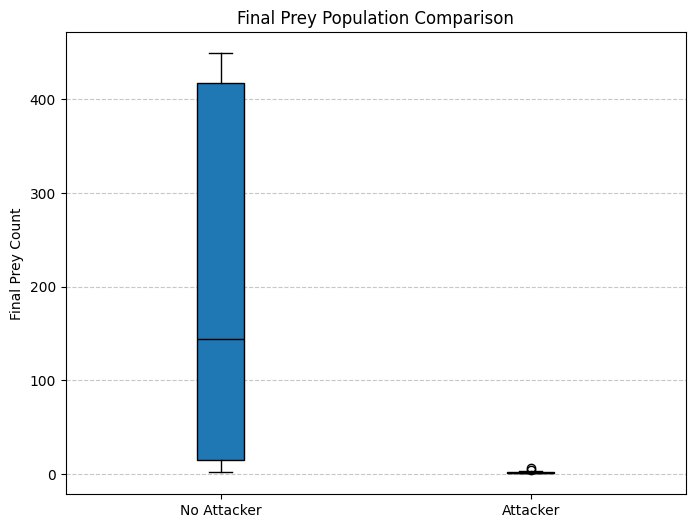

In [ ]:
import os
import polars as pl
import matplotlib.pyplot as plt

# Folder paths
folders = {
    "No Protector": "C:/Users/timo_/OneDrive/Bureau/unif/VU_Amsterdam/PCI/collective-intelligence/Assignment_2/test_results/base_case",
    "Protector": "C:/Users/timo_/OneDrive/Bureau/unif/VU_Amsterdam/PCI/collective-intelligence/Assignment_2/test_results/protector",
}

# Collect final prey counts for each group
final_prey_counts = {}

for label, folder in folders.items():
    prey_counts = []
    for filename in os.listdir(folder):
        if not filename.endswith(".csv"):
            continue
        df = pl.read_csv(os.path.join(folder, filename))
        # Filter for Prey only
        prey_df = df.filter(pl.col("kind") == "Prey")
        # Get final frame number
        max_frame = prey_df["frame"].max()
        # Count number of Prey at final frame
        final_count = prey_df.filter(pl.col("frame") == max_frame).height
        prey_counts.append(final_count)
    final_prey_counts[label] = prey_counts

# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(
    [final_prey_counts["No Protector"], final_prey_counts["Protector"]],
    labels=["No Protector", "Protector"],
    patch_artist=True,
    boxprops=dict(facecolor="#1f77b4"),
    medianprops=dict(color="black")
)
plt.ylabel("Final Prey Count")
plt.title("Final Prey Population Comparison")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import os
import polars as pl
from scipy.stats import f_oneway
import os
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Folder paths
folders = {
    "Base": "C:/Users/timo_/OneDrive/Bureau/unif/VU_Amsterdam/PCI/collective-intelligence/Assignment_2/test_results/base_case",
    "Protector": "C:/Users/timo_/OneDrive/Bureau/unif/VU_Amsterdam/PCI/collective-intelligence/Assignment_2/test_results/protector",
    "Attacker": "C:/Users/timo_/OneDrive/Bureau/unif/VU_Amsterdam/PCI/collective-intelligence/Assignment_2/test_results/attacker"
}

def get_final_prey_counts(folder_path):
    counts = []
    for file in os.listdir(folder_path):
        if not file.endswith(".csv"):
            continue
        df = pl.read_csv(os.path.join(folder_path, file))
        max_frame = df["frame"].max()
        final_frame_prey = df.filter((pl.col("frame") == max_frame) & (pl.col("kind") == "Prey"))
        counts.append(final_frame_prey.height)
    return counts

# Collect all counts
prey_survivals = {name: get_final_prey_counts(path) for name, path in folders.items()}
from scipy.stats import f_oneway

base = prey_survivals["Base"]
protector = prey_survivals["Protector"]
attacker = prey_survivals["Attacker"]

# Base vs Protector
f1, p1 = f_oneway(base, protector)

# Base vs Attacker
f2, p2 = f_oneway(base, attacker)

print("Base vs Protector:")
print(f"F-statistic = {f1:.4f}")
print(f"P-value = {p1:.4f}\n")

print("Base vs Attacker:")
print(f"F-statistic = {f2:.4f}")
print(f"P-value = {p2:.4f}")


Base vs Protector:
F-statistic = 1.0676
P-value = 0.3058

Base vs Attacker:
F-statistic = 34.2584
P-value = 0.0000


C:\Users\timo_\AppData\Local\Temp\ipykernel_20100\2763691237.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Final Prey Count", data=df, palette="Set2")
c:\Users\timo_\OneDrive\Bureau\unif\VU_Amsterdam\PCI\collective-intelligence\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\timo_\OneDrive\Bureau\unif\VU_Amsterdam\PCI\collective-intelligence\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


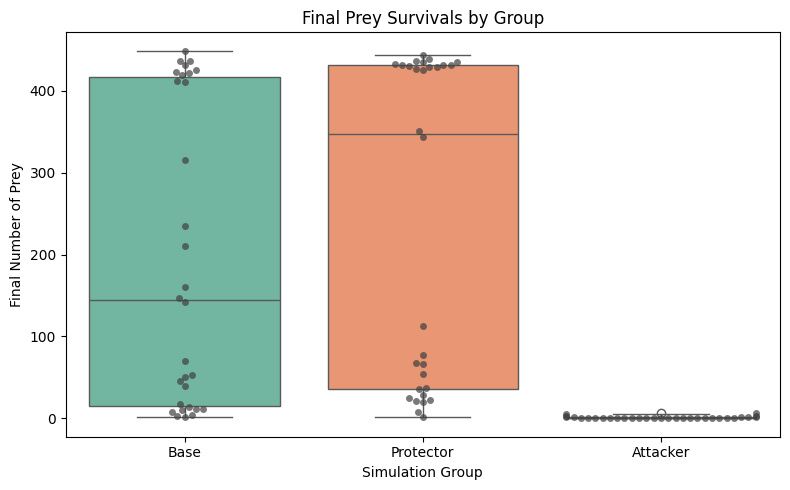

In [33]:
# Combine into a pandas DataFrame in long format
data = []
for group, counts in prey_survivals.items():
    for count in counts:
        data.append({"Group": group, "Final Prey Count": count})

df = pd.DataFrame(data)

# Plot boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="Group", y="Final Prey Count", data=df, palette="Set2")

# Optional: show individual data points
sns.swarmplot(x="Group", y="Final Prey Count", data=df, color=".25", alpha=0.7)

plt.title("Final Prey Survivals by Group")
plt.xlabel("Simulation Group")
plt.ylabel("Final Number of Prey")

plt.tight_layout()
plt.show()

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2  meandiff p-adj   lower    upper   reject
-----------------------------------------------------------
Attacker      Base 192.7688    0.0  98.8122 286.7254   True
Attacker Protector 243.3355    0.0 149.3789 337.2921   True
    Base Protector  50.5667 0.4143 -44.1569 145.2903  False
-----------------------------------------------------------


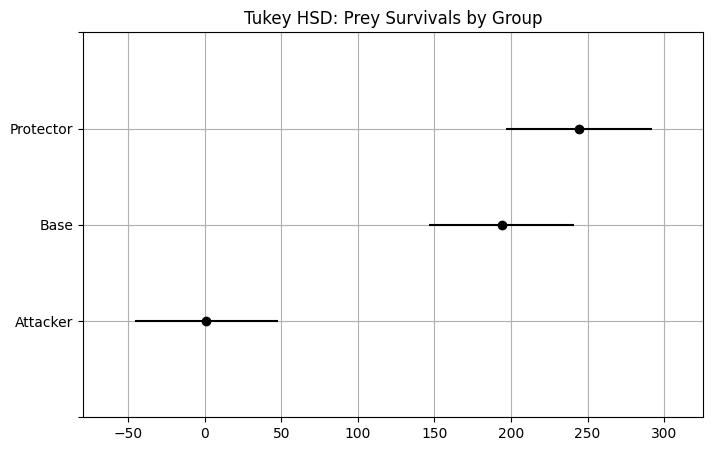

In [12]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Prey survival data
base_prey = [315, 4, 426, 2, 160, 147, 422, 412, 14, 431, 51, 142, 18, 449, 437, 70, 423, 53, 10, 11, 210, 235, 419, 411, 11, 8, 437, 39, 45, 3]
protector_prey = [21, 66, 439, 36, 25, 444, 20, 113, 429, 427, 433, 432, 2, 435, 8, 29, 432, 435, 429, 54, 351, 37, 23, 437, 67, 425, 77, 430, 432, 344]
attacker_prey = [0, 7, 2, 0, 0, 1, 5, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 2, 0, 0, 2, 0, 0, 2, 2, 0]

# Create a flat DataFrame for all data
data = pd.DataFrame({
    "Survivors": base_prey + protector_prey + attacker_prey,
    "Group": (["Base"] * len(base_prey)) +
             (["Protector"] * len(protector_prey)) +
             (["Attacker"] * len(attacker_prey))
})

# Run Tukey HSD test
tukey = pairwise_tukeyhsd(endog=data['Survivors'], groups=data['Group'], alpha=0.05)
print(tukey)

# Optional: plot the results
tukey.plot_simultaneous(figsize=(8, 5))
plt.title("Tukey HSD: Prey Survivals by Group")
plt.grid(True)
plt.show()


In [13]:
import numpy as np

# Final prey survivor counts from your runs
prey_base = [315, 4, 426, 2, 160, 147, 422, 412, 14, 431, 51, 142, 18, 449, 437, 70, 423, 53, 10, 11, 210, 235, 419, 411, 11, 8, 437, 39, 45, 3]
prey_protector = [21, 66, 439, 36, 25, 444, 20, 113, 429, 427, 433, 432, 2, 435, 8, 29, 432, 435, 429, 54, 351, 37, 23, 437, 67, 425, 77, 430, 432, 344]
prey_attacker = [0, 7, 2, 0, 0, 1, 5, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 2, 0, 0, 2, 0, 0, 2, 2, 0]

# Calculate standard deviations
std_base = np.std(prey_base, ddof=1)
std_protector = np.std(prey_protector, ddof=1)
std_attacker = np.std(prey_attacker, ddof=1)

print(f"Standard Deviation - Base: {std_base:.2f}")
print(f"Standard Deviation - Protector: {std_protector:.2f}")
print(f"Standard Deviation - Attacker: {std_attacker:.2f}")


Standard Deviation - Base: 183.42
Standard Deviation - Protector: 195.48
Standard Deviation - Attacker: 1.65


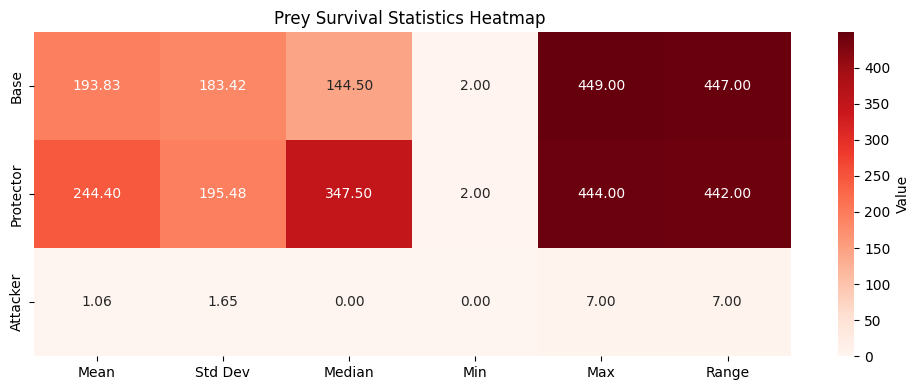

In [25]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

prey_base = [315, 4, 426, 2, 160, 147, 422, 412, 14, 431, 51, 142, 18, 449, 437, 70, 423, 53, 10, 11, 210, 235, 419, 411, 11, 8, 437, 39, 45, 3]
prey_protector = [21, 66, 439, 36, 25, 444, 20, 113, 429, 427, 433, 432, 2, 435, 8, 29, 432, 435, 429, 54, 351, 37, 23, 437, 67, 425, 77, 430, 432, 344]
prey_attacker = [0, 7, 2, 0, 0, 1, 5, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 2, 0, 0, 2, 0, 0, 2, 2, 0]

stats_df = pd.DataFrame({
    'Mean': [np.mean(prey_base), np.mean(prey_protector), np.mean(prey_attacker)],
    'Std Dev': [np.std(prey_base, ddof=1), np.std(prey_protector, ddof=1), np.std(prey_attacker, ddof=1)],
    'Median': [np.median(prey_base), np.median(prey_protector), np.median(prey_attacker)],
    'Min': [np.min(prey_base), np.min(prey_protector), np.min(prey_attacker)],
    'Max': [np.max(prey_base), np.max(prey_protector), np.max(prey_attacker)],
    'Range': [np.ptp(prey_base), np.ptp(prey_protector), np.ptp(prey_attacker)]
}, index=['Base', 'Protector', 'Attacker'])

plt.figure(figsize=(10, 4))

# Use actual stats_df for both values and color
ax = sns.heatmap(
    stats_df,
    annot=stats_df.round(2),
    fmt='.2f',
    cmap='Reds',
    cbar_kws={'label': 'Value'}
)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Prey Survival Statistics Heatmap ')

plt.tight_layout()
plt.show()


In [19]:
import os
import pandas as pd
from scipy.stats import ttest_ind

def get_final_count_from_file(file_path, kind="Prey"):
    df = pd.read_csv(file_path)
    max_frame = df['frame'].max()
    last_frame_df = df[df['frame'] == max_frame]
    count = last_frame_df[last_frame_df['kind'] == kind].shape[0]
    return count

def gather_counts_from_folder(folder_path, kind="Prey"):
    counts = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            count = get_final_count_from_file(file_path, kind)
            counts.append(count)
    return counts

# Set your folder paths
base_case_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/base_case"

test = test.upper()
if test == "ATTACKER":
    variable_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/attacker"
elif test == "PROTECTOR":
    variable_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/protector"
else:
    raise NameError

# Attacker
variable_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/attacker"

# Protector
variable_folder = "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/protector"



NameError: name 'test' is not defined

### Test for prey

In [3]:
protector_counts = gather_counts_from_folder(variable_folder, kind="Prey")
no_protector_counts = gather_counts_from_folder(base_case_folder, kind="Prey")
# Perform Welch's t-test (doesn't assume equal variance)
t_stat, p_value = ttest_ind(protector_counts, no_protector_counts, equal_var=False)

print(f"Protector group counts: {protector_counts}")
print(f"No protector group counts: {no_protector_counts}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print("Significant difference between groups (reject null hypothesis)")
else:
    print("No significant difference between groups (fail to reject null hypothesis)")

Protector group counts: [0, 4, 3, 2, 3, 1, 5, 3, 2, 2, 4, 2, 3, 5, 3, 0, 2, 3, 3, 1, 1, 2, 4, 3, 2, 2, 3, 4, 0, 5]
No protector group counts: [431, 235, 426, 4, 411, 315, 70, 51, 11, 210, 449, 142, 18, 39, 437, 412, 422, 10, 2, 160, 3, 14, 8, 419, 437, 423, 45, 147, 53, 11]
T-statistic: -5.7115
P-value: 0.0000035231
Significant difference between groups (reject null hypothesis)


### Test for predators

In [4]:
protector_counts = gather_counts_from_folder(variable_folder, kind="Predator")
no_protector_counts = gather_counts_from_folder(base_case_folder, kind="Predator")
# Perform Welch's t-test (doesn't assume equal variance)
t_stat, p_value = ttest_ind(protector_counts, no_protector_counts, equal_var=False)

print(f"Protector group counts: {protector_counts}")
print(f"No protector group counts: {no_protector_counts}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print("Significant difference between groups (reject null hypothesis)")
else:
    print("No significant difference between groups (fail to reject null hypothesis)")

Protector group counts: [2, 2, 2, 3, 1, 5, 3, 3, 2, 1, 2, 4, 5, 4, 1, 3, 2, 0, 1, 0, 3, 5, 2, 2, 2, 4, 1, 1, 4, 2]
No protector group counts: [0, 0, 0, 9, 0, 0, 24, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 11, 10, 14, 0, 0, 0, 0, 0, 154, 2]
T-statistic: -1.1044
P-value: 0.2784659246
No significant difference between groups (fail to reject null hypothesis)


### Code for heatmap

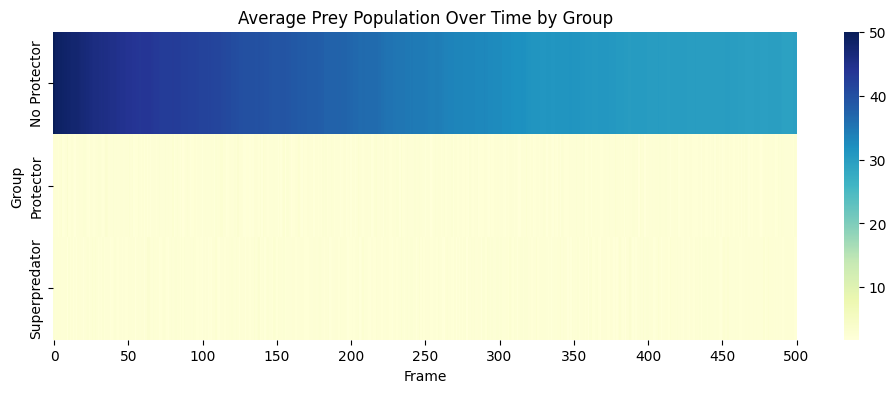

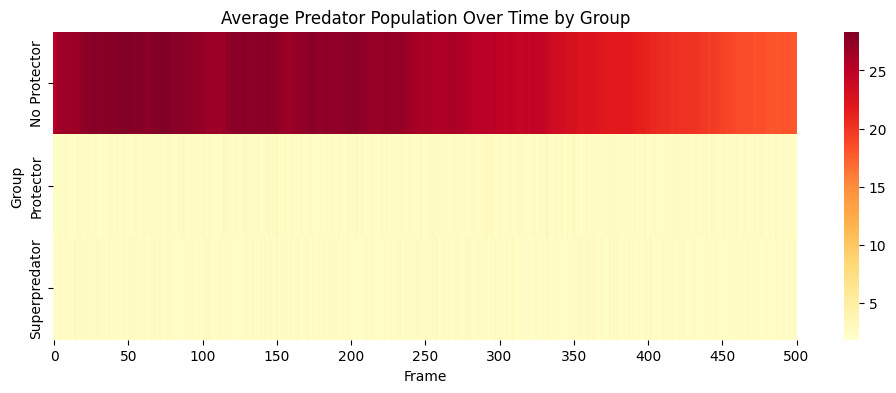

In [ ]:
"""
import os
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to your folders:
folders = {
    "No Protector": "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/base_case",
    "Protector": "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/protector",
    "Superpredator": "/Users/sybemelsert/Documents/Vrije_Universiteit/P6_Collective_Intelligence/collective-intelligence/Assignment_2/test_results/attacker",
}

def get_average_population_over_time(folder_path, kind, max_frame=1000):
    # Accumulate population counts per frame for all runs in this folder
    population_matrix = []
    
    for filename in os.listdir(folder_path):
        if not filename.endswith(".csv"):
            continue
        df = pl.read_csv(os.path.join(folder_path, filename))
        # Filter for the agent kind
        df_kind = df.filter(pl.col("kind") == kind)
        
        # Count number alive at each frame (0 to max_frame)
        frame_counts = []
        for frame in range(max_frame+1):
            count = df_kind.filter(pl.col("frame") == frame).height
            frame_counts.append(count)
        
        population_matrix.append(frame_counts)
    
    # Convert to numpy array: runs x frames
    population_matrix = np.array(population_matrix)
    
    # Average over runs (axis=0)
    avg_population = np.mean(population_matrix, axis=0)
    return avg_population

# Parameters
max_frame = 500  # adjust depending on your simulation length

# Prepare data for heatmap: each row = group, columns = frames
prey_data = []
predator_data = []

for group_name, folder_path in folders.items():
    avg_prey = get_average_population_over_time(folder_path, "Prey", max_frame)
    avg_pred = get_average_population_over_time(folder_path, "Predator", max_frame)
    prey_data.append(avg_prey)
    predator_data.append(avg_pred)

prey_data = np.array(prey_data)
predator_data = np.array(predator_data)

# Plot heatmap for prey counts
plt.figure(figsize=(12, 4))
sns.heatmap(prey_data, xticklabels=50, yticklabels=list(folders.keys()), cmap="YlGnBu")
plt.title("Average Prey Population Over Time by Group")
plt.xlabel("Frame")
plt.ylabel("Group")
plt.show()

# Plot heatmap for predator counts
plt.figure(figsize=(12, 4))
sns.heatmap(predator_data, xticklabels=50, yticklabels=list(folders.keys()), cmap="YlOrRd")
plt.title("Average Predator Population Over Time by Group")
plt.xlabel("Frame")
plt.ylabel("Group")
plt.show()
"""

### One way ANOVA

In [6]:
import polars as pl
import os
from scipy.stats import f_oneway

def get_final_counts(folder_path, kind, final_frame=500):
    counts = []
    for filename in os.listdir(folder_path):
        if not filename.endswith(".csv"):
            continue
        df = pl.read_csv(os.path.join(folder_path, filename))
        count = df.filter((pl.col("kind") == kind) & (pl.col("frame") == final_frame)).height
        counts.append(count)
    return counts

# Extract data
prey_counts_per_group = []
predator_counts_per_group = []
group_names = []

for group_name, folder_path in folders.items():
    prey_counts = get_final_counts(folder_path, "Prey")
    predator_counts = get_final_counts(folder_path, "Predator")
    if prey_counts and predator_counts:
        prey_counts_per_group.append(prey_counts)
        predator_counts_per_group.append(predator_counts)
        group_names.append(group_name)

# Run ANOVA for Prey
f_stat_prey, p_value_prey = f_oneway(*prey_counts_per_group)
print(f"ANOVA Prey: F = {f_stat_prey:.3f}, p = {p_value_prey:.5f}")

# Run ANOVA for Predator
f_stat_pred, p_value_pred = f_oneway(*predator_counts_per_group)
print(f"ANOVA Predator: F = {f_stat_pred:.3f}, p = {p_value_pred:.5f}")


ANOVA Prey: F = 148.363, p = 0.00000
ANOVA Predator: F = 226.410, p = 0.00000


### Standard Deviation

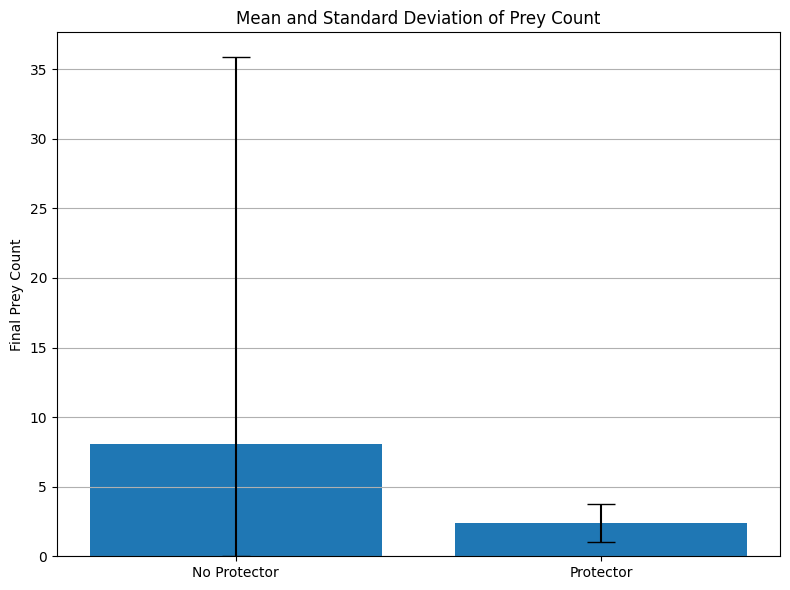

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Compute stats
labels = ['No Protector', 'Protector']
means = [np.mean(no_protector_counts), np.mean(protector_counts)]
stds = [np.std(no_protector_counts), np.std(protector_counts)]

# Ensure error bars don't dip below zero
lower_errors = [min(mean, std) for mean, std in zip(means, stds)]
upper_errors = stds
error_bars = [lower_errors, upper_errors]

# Plot with asymmetric error bars
plt.figure(figsize=(8, 6))
plt.bar(labels, means, yerr=error_bars, capsize=10)
plt.ylabel("Final Prey Count")
plt.title("Mean and Standard Deviation of Prey Count")
plt.grid(axis="y")
plt.tight_layout()
plt.show()